In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster 
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('Sleep_Analysis.csv', sep=',')

# Data cleaning

In [3]:
df.head()

,Age,Gender,meals/day,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,22,Male,two,no,2hrs,yes,west,sometimes,no,Tea,6.7575
1,22,Female,three,no,3-4 hrs,no,south,no,no,Coffee,8.0000
2,23,Male,three,no,3-4 hrs,no,south,no,no,Tea,8.0000
3,23,Female,two,no,1-2 hrs,no,east,sometimes,no,Coffee,6.5000
4,22,Male,three,no,more than 5,yes,east,sometimes,yes,Tea and Coffee both,6.0000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               823 non-null    object 
 1   Gender            823 non-null    object 
 2   meals/day         823 non-null    object 
 3   physical illness  823 non-null    object 
 4   screen time       823 non-null    object 
 5   bluelight filter  823 non-null    object 
 6   sleep direction   823 non-null    object 
 7   exercise          823 non-null    object 
 8   smoke/drink       823 non-null    object 
 9   beverage          823 non-null    object 
 10  sleep time        802 non-null    float64
dtypes: float64(1), object(10)
memory usage: 70.9+ KB


In [5]:
df.isnull().sum()

Age                  0
Gender               0
meals/day            0
physical illness     0
screen time          0
bluelight filter     0
sleep direction      0
exercise             0
smoke/drink          0
beverage             0
sleep time          21
dtype: int64

In [6]:
print (df['sleep direction'].unique())

['west' 'south' 'east' 'north' 'yes']


In [7]:
print (df['meals/day'].unique())

['two' 'three' 'four' 'more than 5' 'five' 'one' 'no']


# Missing values and data conversion

In [8]:

#df['Tea']
list( filter(lambda x: x%2==0, map(lambda x: x*2, range(101) )) )

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 200]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               823 non-null    object 
 1   Gender            823 non-null    object 
 2   meals/day         823 non-null    object 
 3   physical illness  823 non-null    object 
 4   screen time       823 non-null    object 
 5   bluelight filter  823 non-null    object 
 6   sleep direction   823 non-null    object 
 7   exercise          823 non-null    object 
 8   smoke/drink       823 non-null    object 
 9   beverage          823 non-null    object 
 10  sleep time        802 non-null    float64
dtypes: float64(1), object(10)
memory usage: 70.9+ KB


In [10]:
df["Gender"].fillna("o", inplace = True)
df['Gender'] = np.array(list(map(lambda x: 1 if "Male" in x else 0, df['Gender'])))
df['sleep direction'].replace({'north':0, 'west' : 270, 'east':90,'south':360,'yes':1 }, inplace=True)
df['bluelight filter'].replace({'no':0, 'yes': 1,'north':2}, inplace=True)
df.drop('meals/day', axis=1, inplace=True)
df['physical illness'].replace({'no':0, 'yes': 1}, inplace=True)
df['smoke/drink'].replace({'no':0,'yes':1,'Tea and Coffee both':2}, inplace=True)
df['exercise'].replace({'no':0,'sometimes':1,'yes':2}, inplace=True)
df['beverage'].replace({'Tea':2,'Coffee':1,'Tea and Coffee both':3,'none of the above':0,'7.0':5}, inplace=True)
df['screen time'].replace({'2hrs':2,'3-4 hrs':4,'1-2 hrs':1,'more than 5':6,'2-3 hrs':3, '4-5 hrs':5, '0-1 hrs':1, 'yes':1}, inplace=True)
df['physical illness'].replace({'more than 5':2},inplace=True)
df['Age'].replace({'22':22, '23':23, '24':24, '28':28, '59':59, '25':25, '39':39, '50':50, '20':20, '21':21, 'Female':25}, inplace=True )
df["sleep time"].fillna(df["sleep time"].mean(), inplace=True) 

In [11]:
print(df['beverage'].unique())

[2 1 3 0 5]


In [12]:
df.head()

,Age,Gender,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,22,1,0,2,1,270,1,0,2,6.7575
1,22,0,0,4,0,360,0,0,1,8.0000
2,23,1,0,4,0,360,0,0,2,8.0000
3,23,0,0,1,0,90,1,0,1,6.5000
4,22,1,0,6,1,90,1,1,3,6.0000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               823 non-null    int64  
 1   Gender            823 non-null    int32  
 2   physical illness  823 non-null    int64  
 3   screen time       823 non-null    int64  
 4   bluelight filter  823 non-null    int64  
 5   sleep direction   823 non-null    int64  
 6   exercise          823 non-null    int64  
 7   smoke/drink       823 non-null    int64  
 8   beverage          823 non-null    int64  
 9   sleep time        823 non-null    float64
dtypes: float64(1), int32(1), int64(8)
memory usage: 61.2 KB


In [14]:
print(df['sleep direction'].unique())

[270 360  90   0   1]


In [15]:
df["smoke/drink"].unique()

array([0, 1, 2], dtype=int64)

In [16]:
df['screen time'].unique()

array([2, 4, 1, 6, 3, 5], dtype=int64)

In [17]:
df['Age'].unique()

array([22, 23, 24, 28, 59, 25, 39, 50, 20, 21], dtype=int64)

In [18]:
df['bluelight filter'].unique()

array([1, 0, 2], dtype=int64)

In [19]:
df['physical illness'].unique()

array([0, 1, 2], dtype=int64)

In [20]:
df.head()

,Age,Gender,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,22,1,0,2,1,270,1,0,2,6.7575
1,22,0,0,4,0,360,0,0,1,8.0000
2,23,1,0,4,0,360,0,0,2,8.0000
3,23,0,0,1,0,90,1,0,1,6.5000
4,22,1,0,6,1,90,1,1,3,6.0000


<AxesSubplot:>

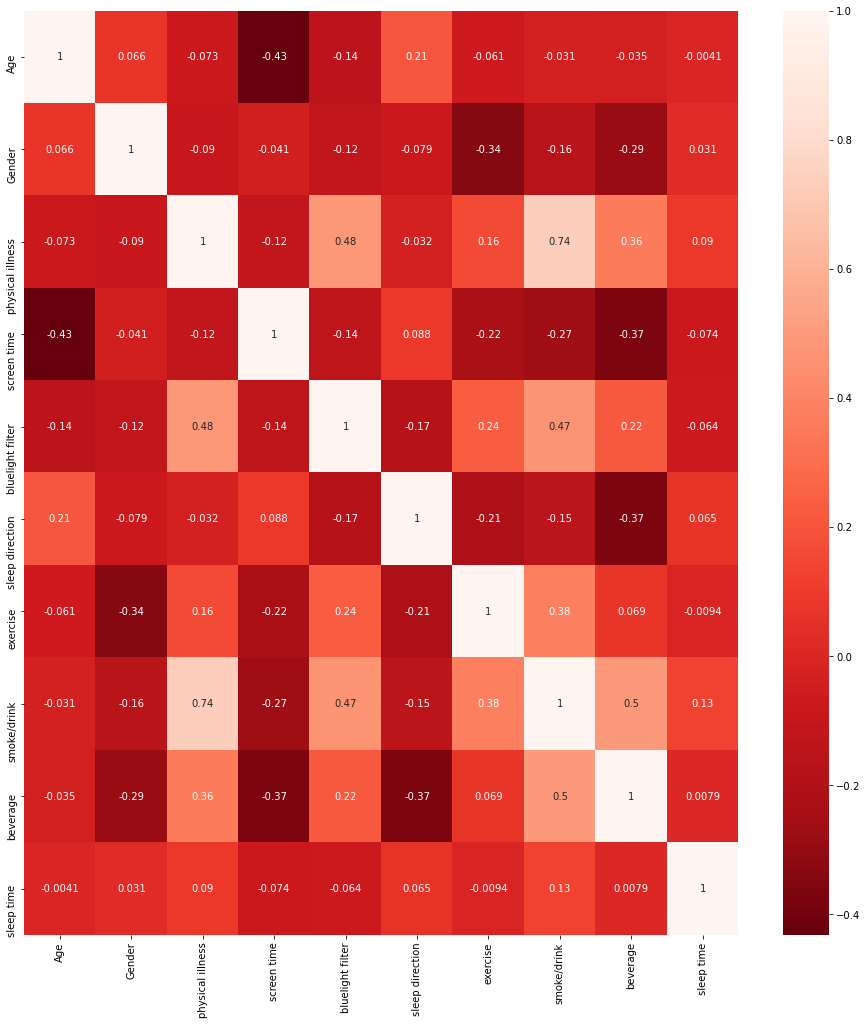

In [21]:
fig, ax = plt.subplots(figsize=(16,17))
sns.heatmap(df.corr(), ax=ax, annot=True, cmap="Reds_r")

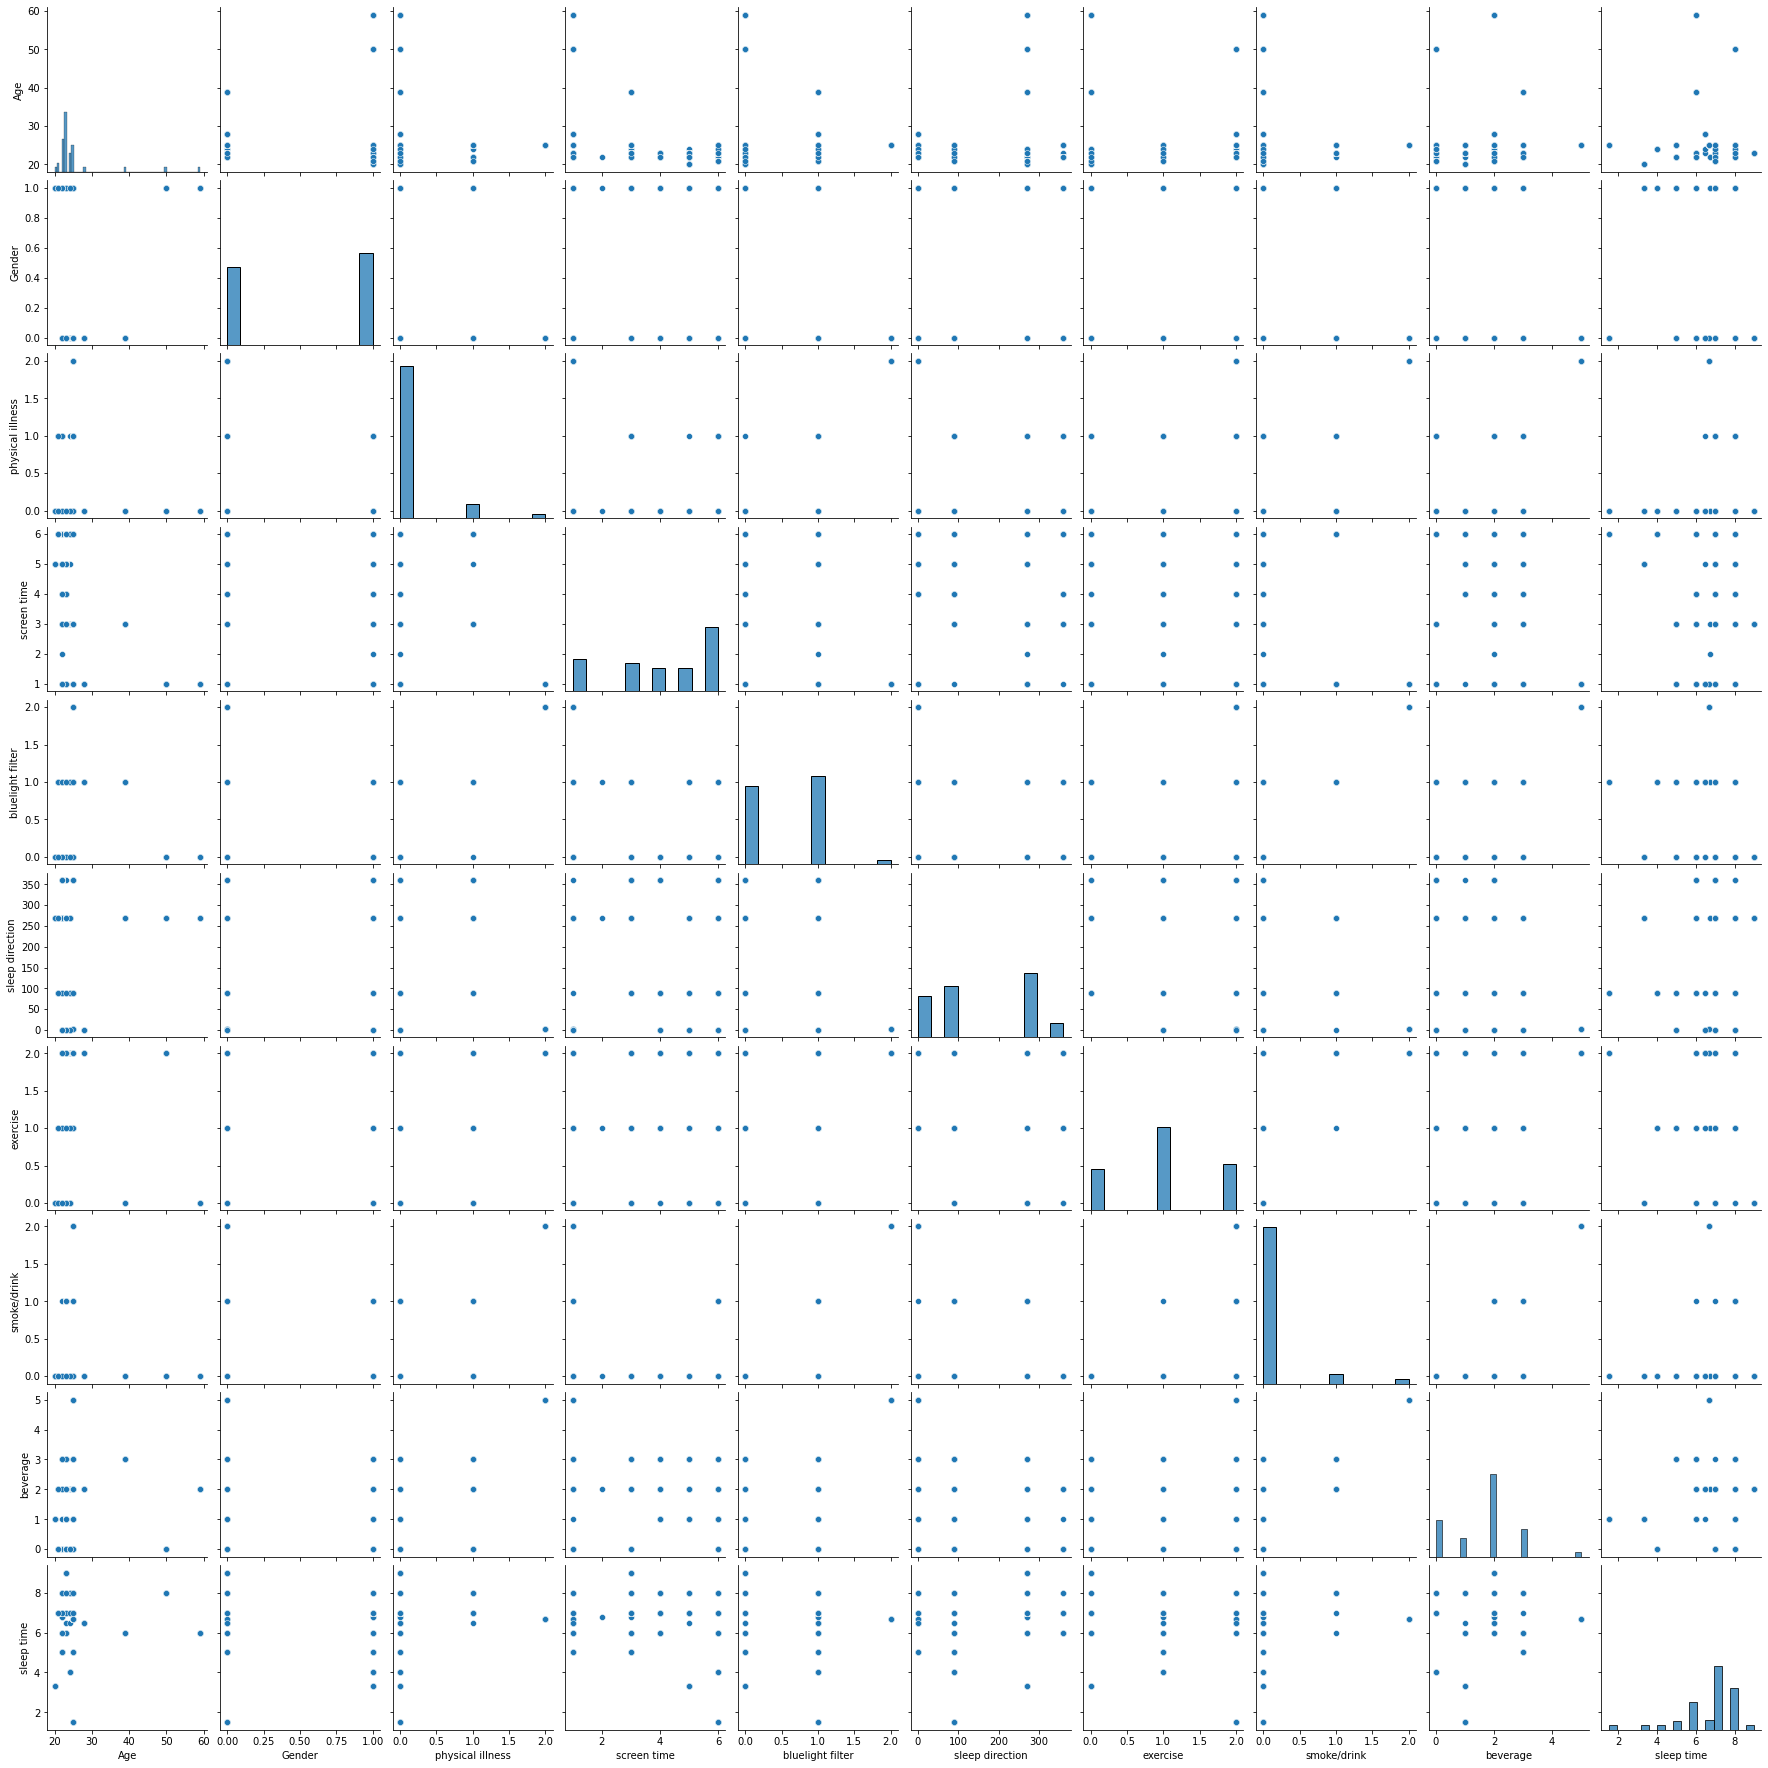

In [22]:
sns.pairplot(df)

In [23]:
print(df.columns)

Index(['Age', 'Gender', 'physical illness', 'screen time', 'bluelight filter',
       'sleep direction', 'exercise', 'smoke/drink', 'beverage', 'sleep time'],
      dtype='object')


# k-means clustering

In [24]:
#mean pas variable
df.mean(axis=0)

Age                  25.292831
Gender                0.541920
physical illness      0.132442
screen time           4.157959
bluelight filter      0.566221
sleep direction     158.810450
exercise              1.026731
smoke/drink           0.106926
beverage              1.697448
sleep time            6.680517
dtype: float64

In [25]:
#écarts-types entre les variables
df.std(axis=0)

Age                   7.605897
Gender                0.498543
physical illness      0.407598
screen time           1.866423
bluelight filter      0.544985
sleep direction     124.676401
exercise              0.716007
smoke/drink           0.383019
beverage              1.130028
sleep time            1.430496
dtype: float64

In [26]:
#K-means avec deux groupes
w=cluster.KMeans(n_clusters=4)
w.fit(df)

KMeans(n_clusters=4)

In [27]:
w.labels_

array([0, 3, 3, 1, 1, 0, 3, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 3, 0, 0,
       2, 3, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 3, 1, 1, 1,
       1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 3, 0, 0, 2, 3, 2, 2, 1, 0, 0,
       0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1,
       2, 0, 0, 2, 0, 3, 0, 0, 2, 3, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0,
       0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 3, 0,
       0, 2, 3, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 3, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 3, 0, 0, 2, 3, 2, 2, 1, 0,
       0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0,
       1, 2, 0, 0, 2, 0, 3, 0, 0, 2, 3, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 1, 1, 0, 3, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 3,
       0, 0, 2, 3, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 3, 1,
       1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 3, 0, 0, 2, 3, 2, 2, 1,
       0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 3, 1,

In [28]:
import numpy


In [29]:
numpy.unique(w.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([310, 246, 198,  69], dtype=int64))

In [30]:
#rajout variable au data-frame
B=df.copy()
B['labels']=w.labels_

C:\Users\otaky\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otaky\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otaky\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otaky\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


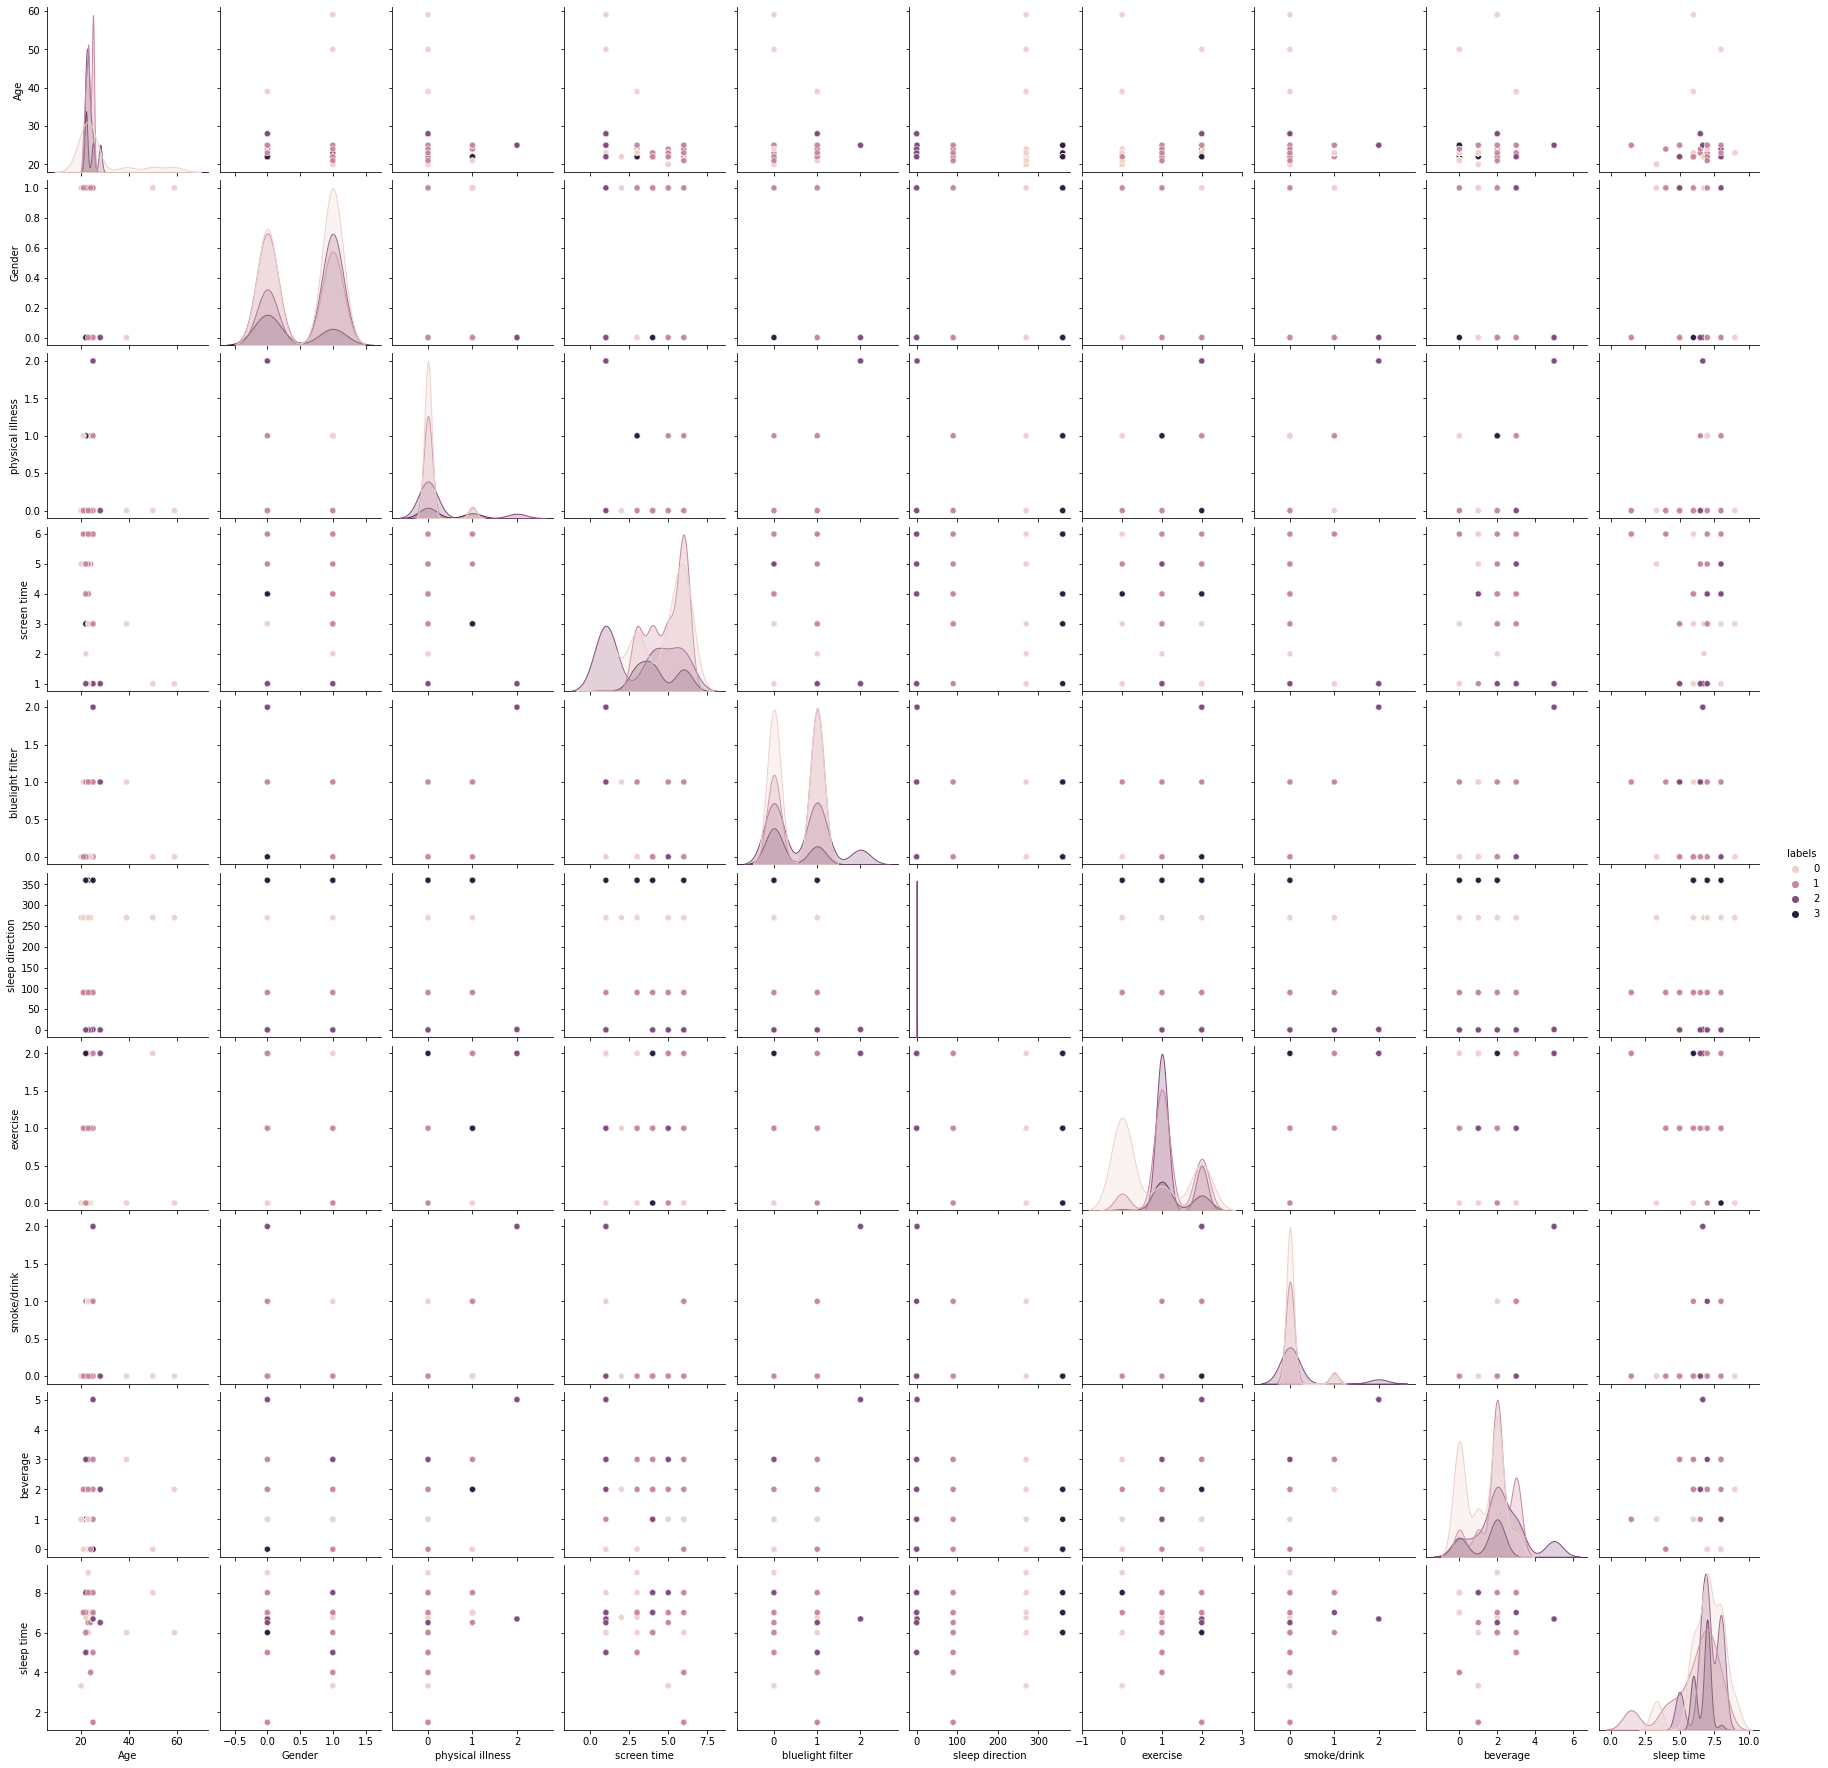

In [31]:
sns.pairplot(B,hue="labels")

In [32]:
#moyenne par groupe 
gb=df.groupby(w.labels_)

In [33]:
#effectif par colone
gb.size()

0    310
1    246
2    198
3     69
dtype: int64

In [34]:
gb.mean()

,Age,Gender,physical illness,screen time,bluelight filter,sleep direction,exercise,smoke/drink,beverage,sleep time
0,28.387097,0.574194,0.070968,4.132258,0.503226,270.000000,0.716129,0.070968,1.219355,6.950887
1,23.451220,0.455285,0.093496,4.890244,0.634146,90.000000,1.182927,0.093496,1.991870,6.056911
2,23.545455,0.666667,0.212121,3.247475,0.661616,0.106061,1.222222,0.217172,2.212121,7.021671
3,22.971014,0.347826,0.318841,4.275362,0.333333,360.000000,1.304348,0.000000,1.318841,6.710145


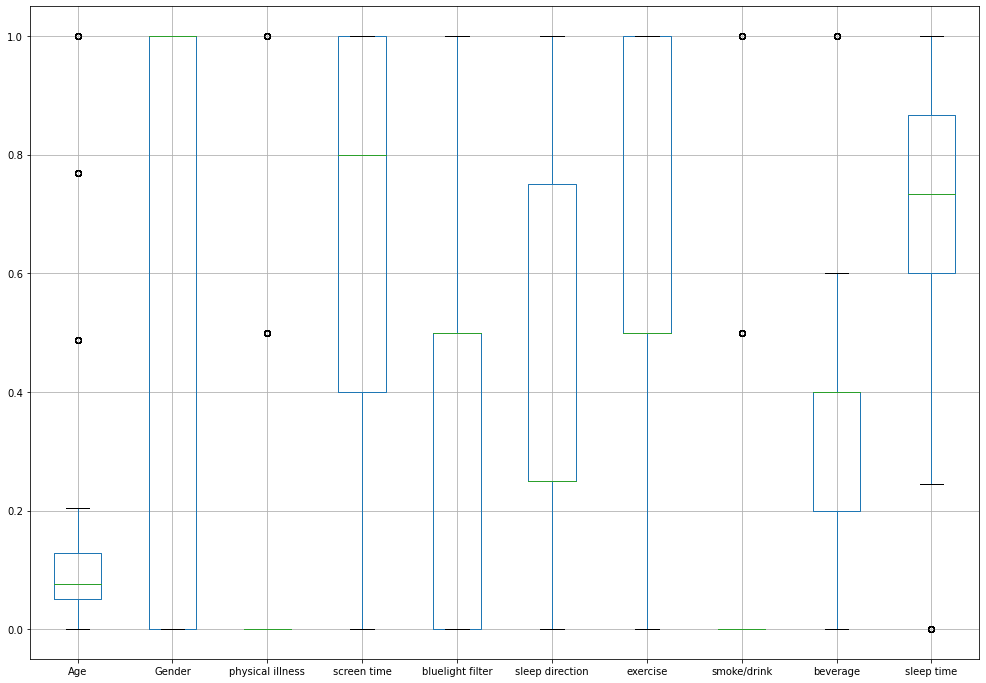

In [35]:
df_box = df.copy()

for col in df_box.columns:
    df_box[col] = (df_box[col] - df_box[col].min())/(df_box[col].max() - df_box[col].min())
fig, ax = plt.subplots(figsize=(17,12))
df_box.plot.box(ax=ax)
ax.grid()

In [57]:
x=df.drop('sleep time', axis=1).values
y=df["sleep time"].values

In [ ]:
from sklearn.model.selection import 

In [92]:
poly= PolynomialFeatures(degree=2)

In [93]:
x_poly=poly.fit_transform(x)

In [94]:
x_train, x_test, y_train, y_test =train_test_split(x_poly, y, test_size=.20, stratify=y)

In [95]:
x_poly.shape

(823, 55)

In [96]:
linreg=LinearRegression()

In [97]:
linreg.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred=linreg.predict(x_test)

In [101]:
round(r2_score(y_test,y_pred)*100, 2)

98.49

In [102]:
import pickle

filename = 'f_model.sav'
with open(filename, "wb") as f:
    pickle.dump(linreg, f)

In [ ]:
with open(filename, "wb") as f:
    pickle.dump(linreg, f)